In [1]:
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline

import seaborn as sns
sns.set(style="darkgrid")

In [2]:
df = pd.read_csv("stats.csv", index_col="date", parse_dates=['date'], infer_datetime_format=True)
cases_df = df.loc[:, ["cases", "deaths"]]
tests_df = df.loc[:, ["test_positive", "test_total"]]

# Evolution Charts

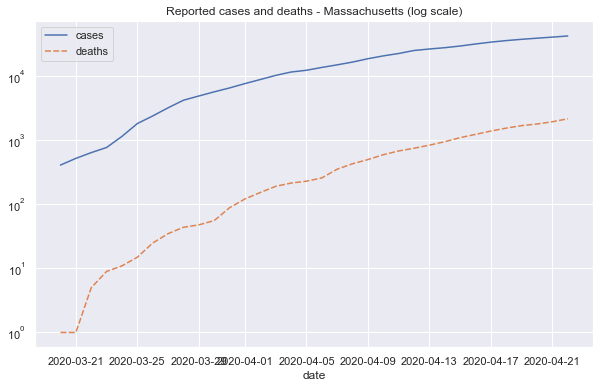

In [3]:
plt.figure(figsize=(10, 6))
ax = sns.lineplot(data=cases_df)
ax.set_yscale("log")

plt.title("Reported cases and deaths - Massachusetts (log scale)")

plt.show()

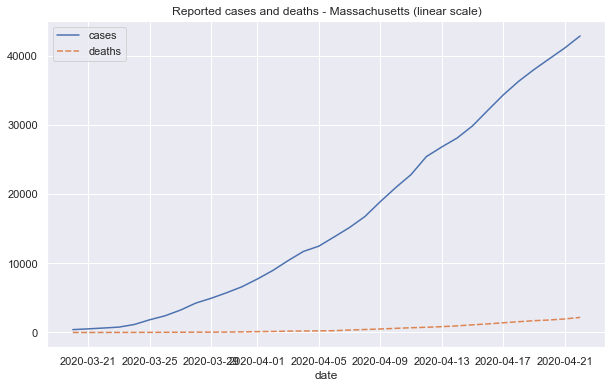

In [4]:
plt.figure(figsize=(10, 6))
ax = sns.lineplot(data=cases_df)
ax.set_yscale("linear")

plt.title("Reported cases and deaths - Massachusetts (linear scale)")

plt.show()

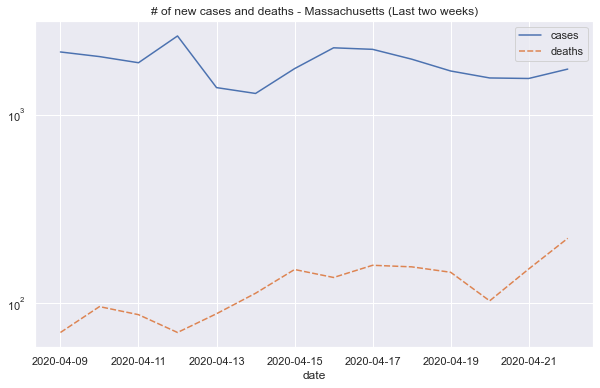

In [5]:
plt.figure(figsize=(10, 6))
ax = sns.lineplot(data=cases_df.diff().iloc[-14:])
ax.set_yscale("log")

plt.title("# of new cases and deaths - Massachusetts (Last two weeks)")

plt.show()

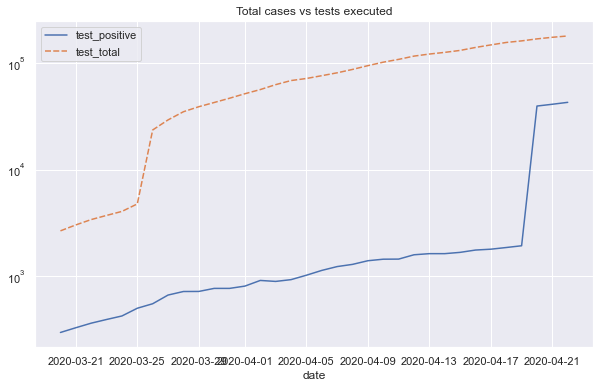

In [6]:
plt.figure(figsize=(10, 6))
ax = sns.lineplot(data=tests_df)
ax.set_yscale("log")

plt.title("Total cases vs tests executed")

plt.show()

   # Data for the past week

In [7]:
df[-7:]

,cases,deaths,test_positive,test_total
date,,,,
2020-04-16,32181,1245,1760,140773
2020-04-17,34402,1404,1793,148744
2020-04-18,36372,1560,1859,156806
2020-04-19,38077,1706,1931,162241
2020-04-20,39643,1809,39643,169398
2020-04-21,41199,1961,41199,175372
2020-04-22,42944,2182,42944,180462


In [8]:
df.pct_change().iloc[-7:]

,cases,deaths,test_positive,test_total
date,,,,
2020-04-16,0.075640,0.123646,0.051374,0.066276
2020-04-17,0.069016,0.127711,0.018750,0.056623
2020-04-18,0.057264,0.111111,0.036810,0.054201
2020-04-19,0.046877,0.093590,0.038731,0.034661
2020-04-20,0.041127,0.060375,19.529777,0.044113
2020-04-21,0.039250,0.084024,0.039250,0.035266
2020-04-22,0.042355,0.112698,0.042355,0.029024
